# References

https://nlp.stanford.edu/seminar/details/pbhattacharyya.pdf - Literature on sarcasm detection

https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3384025 - 
Literature on sarcasm detection





In [ ]:
from google.colab import drive

drive.mount('/content/drive')

%cd drive/MyDrive/CS3244_data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 2] No such file or directory: 'drive/MyDrive/CS3244_data'
/content/drive/MyDrive/CS3244_data


In [ ]:
import os
import numpy as np
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score, precision_score, recall_score, roc_auc_score

import nltk
nltk.download('stopwords')
import re,string,unicodedata
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import seaborn as sns
from matplotlib import pyplot as plt
from nltk.corpus import stopwords as stopwordprovider
from nltk.stem.porter import PorterStemmer

import nltk
nltk.download("wordnet")
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
data = pd.read_csv('train-balanced-sarcasm.csv')
data.dropna(subset=['comment'], inplace=True)
# data["tokenized_words"] = data["comment"].apply(lambda x: nltk.word_tokenize(x))
# length = 500000

# pos_data = data[data['label'] == 1]
# neg_data = data[data['label'] == 0]

# pos_train_df = pos_data.iloc[0:int(length/2)]
# neg_train_df = neg_data.iloc[0:int(length/2)]

# train_df = pos_train_df.append(neg_train_df, ignore_index=True).sample(frac = 1)
# train_df["tokenized_words"] = train_df["comment"].apply(lambda x: nltk.word_tokenize(x))

In [ ]:
file = open('negative-words.txt', 'r', encoding="ISO-8859-1")
neg_words = file.read().split()

In [ ]:
file = open('positive-words.txt', 'r')
pos_words = file.read().split()

#CUSTOM FEATURES

In [ ]:
tags = ['JJ', 'JJR', 'JJS', 'RB', 'RBR', 'RBS', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']
import string

def alphabet_rep(text):
  count = 0
  letter = text[0]
  for i in text:
    if count > 2 :
      return 1
    if i == letter:
      count += 1
    else:
      letter = i
  return 0

def exclamation_freq(text):
  count = 0
  for i in text:
    if i == "!":
      count += 1
  freq = count/len(text)
  return freq

def question_freq(text):
  count = 0
  for i in text:
    if i == "?":
      count += 1
  freq = count/len(text)
  return freq

def dots_freq(text):
  count = 0
  for i in text:
    if i == ".":
      count += 1
  freq = count/len(text)
  return freq

def caps_freq(text):
  count = 0
  for i in text:
    if i.isupper():
      count += 1
  return count/len(text)

def quotes_freq(text):
  count = 0
  for i in text:
    if i in  ("\'" ,"\""):
      count += 1
  freq = count/len(text)
  return freq

def consecutive_caps(text):
  n = len(text)
  count = 0
  for i in range(n):
    if (i < n - 1 and text[i].isupper() and text[i+1].isupper()):
      if i == 0 and text[i].isupper():
        count += 1
      if i > 0 and not text[i - 1].isupper():
        count += 1
      count += 1
  
  freq = count/len(text)
  return freq

def consecutive_dots(text):
  n = len(text)
  count = 0
  for i in range(n):
    if (i < n - 1 and text[i] == "." and text[i+1] == "."):
      if i == 0 and text[i] == ".":
        count += 1
      if i > 0 and not text[i - 1] == ".":
        count += 1
      count += 1
  
  freq = count/len(text)
  return freq

def consecutive_exclamations(text):
  n = len(text)
  count = 0
  for i in range(n):
    if (i < n - 1 and text[i] == "!" and text[i+1] == "!"):
      if i == 0 and text[i] == "!":
        count += 1
      if i > 0 and not text[i - 1] == "!":
        count += 1
      count += 1
  
  freq = count/len(text)
  return freq

def consecutive_question(text):
  n = len(text)
  count = 0
  for i in range(n):
    if (i < n - 1 and text[i] == "?" and text[i+1] == "?"):
      if i == 0 and text[i] == "?":
        count += 1
      if i > 0 and not text[i - 1] == "?":
        count += 1
      count += 1

  freq = count/len(text)
  return freq

def consecutive_punctuations(text):
  n = len(text)
  count = 0
  for i in range(n):
    if (i < n - 1 and text[i] in string.punctuation and text[i+1] in string.punctuation):
      if i == 0 and text[i] in string.punctuation:
        count += 1
      if i > 0 and not text[i - 1] in string.punctuation:
        count += 1
      count += 1

  freq = count/len(text)
  return freq


In [ ]:
weight = 3
def add_new_features(df, col_name=""):
  df_copy = df.copy()
  df_copy["alphabet"] = df[col_name].apply(lambda x: alphabet_rep(x))
  df_copy["exclamation"] = df[col_name].apply(lambda x: exclamation_freq(x))
  df_copy["dots"] = df[col_name].apply(lambda x: dots_freq(x))
  df_copy["question"] = df[col_name].apply(lambda x: question_freq(x))
  df_copy["caps"] = df[col_name].apply(lambda x: caps_freq(x))
  df_copy["quotes"] = df[col_name].apply(lambda x: quotes_freq(x))

  df_copy["consecutive_caps"] = df[col_name].apply(lambda x: consecutive_caps(x))
  # df_copy["consecutive_dots"] = df[col_name].apply(lambda x: consecutive_dots(x))
  df_copy["consecutive_exclamations"] = df[col_name].apply(lambda x: consecutive_exclamations(x))
  df_copy["consecutive_question"] = df[col_name].apply(lambda x: consecutive_question(x))
  df_copy["consecutive_punctuations"] = df[col_name].apply(lambda x: consecutive_punctuations(x))

  # df_copy['pos_count'] = df["tokenized_words"].apply(lambda x: len([i for i in x if i in pos_words]))
  # df_copy['neg_count'] = df["tokenized_words"].apply(lambda x: len([i for i in x if i in neg_words]))
  # df_copy["num_highly_pos"] = df["tokenized_words"].apply(lambda x: len([i for i in x if i in pos_words and nltk.pos_tag(nltk.word_tokenize(i))[0][1] in tags]))
  # df_copy["num_highly_neg"] = df["tokenized_words"].apply(lambda x: len([i for i in x if i in neg_words and nltk.pos_tag(nltk.word_tokenize(i))[0][1] in tags]))
  # df_copy["sentiment_contrast_score"] = ((weight*df_copy["num_highly_pos"] + df_copy['pos_count']) - (weight*df_copy["num_highly_neg"] - df_copy['neg_count']))/((weight*df_copy["num_highly_pos"] + df_copy['pos_count']) + (weight*df_copy["num_highly_neg"] - df_copy['neg_count']))

  df_copy = df_copy.fillna(0)
  return df_copy

In [ ]:
new_df = add_new_features(data, "comment")
new_df.head()

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment,alphabet,consecutive_caps,consecutive_dots,consecutive_exclamations,consecutive_question,consecutive_punctuations
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ...",0,0.4,0.0,0.0,0.0,0.0
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...,0,0.0,0.0,0.0,0.0,0.0
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.,1,0.0,0.0,0.0,0.0,0.0
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz,1,0.0,0.0,0.0,0.0,0.0
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...,0,0.0,0.0,0.0,0.0,0.0


In [ ]:
new_df = new_df.drop(["subreddit", "author", "score", "ups", "downs", "date", "created_utc", "parent_comment"], axis=1)
train_data = new_df.drop(["label"], axis=1)

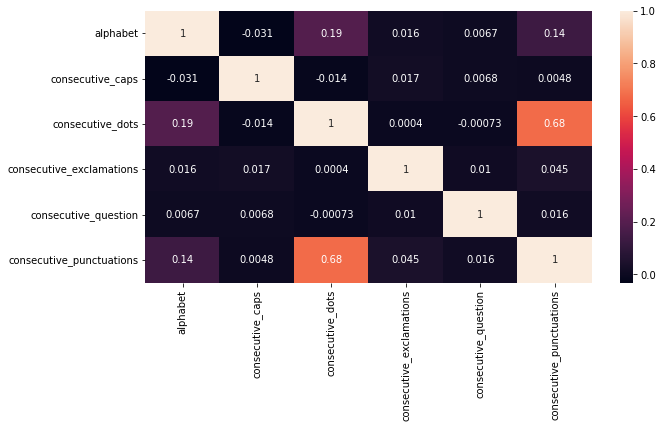

In [ ]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

corr_data = train_data.drop(["comment"], axis=1)
corr_matrix = corr_data.corr()
fig, ax = plt.subplots(figsize=(10,5))
sn.heatmap(corr_matrix, annot=True)
plt.show()

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(train_data, new_df['label'], test_size=0.2,random_state=17)

X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
Y_train.reset_index(drop=True, inplace=True)
Y_test.reset_index(drop=True, inplace=True)

X_train = X_train.fillna(0)
X_train.replace([np.inf, -np.inf], 0, inplace=True)
X_test = X_test.fillna(0)
X_test.replace([np.inf, -np.inf], 0, inplace=True)

X_train.head()

,comment,alphabet,exclamation,dots,question,caps,quotes
0,Thats why the ground outside is so free of bac...,0,0.0,0.000000,0.017241,0.017241,0.000000
1,Noone can see above 24 fps too,1,0.0,0.000000,0.000000,0.033333,0.000000
2,I'll hunt you down if you're wrong,0,0.0,0.000000,0.000000,0.029412,0.058824
3,Flex your quads and surprise boners go away in...,0,0.0,0.018182,0.000000,0.018182,0.000000
4,I doubt they dislike them because of their vie...,0,0.0,0.017544,0.000000,0.017544,0.000000


# Running All

In [ ]:
# from scipy.sparse.construct import hstack
# tf_idf = TfidfVectorizer(ngram_range=(1, 2), max_features=200, min_df=2)
# X_train_comments = tf_idf.fit_transform(X_train['comment'].values)
# X_train_all = hstack([X_train_comments, X_train['alphabet'].values.reshape(-1, 1), X_train['exclamation'].values.reshape(-1, 1), X_train['dots'].values.reshape(-1, 1), X_train['question'].values.reshape(-1, 1), X_train['caps'].values.reshape(-1, 1),X_train['quotes'].values.reshape(-1, 1),X_train['consecutive_caps'].values.reshape(-1, 1),X_train['consecutive_dots'].values.reshape(-1, 1),X_train['consecutive_exclamations'].values.reshape(-1, 1),X_train['consecutive_question'].values.reshape(-1, 1),X_train['consecutive_punctuations'].values.reshape(-1, 1)])

# X_test_comments = tf_idf.transform(X_test['comment'].values)
# X_test_all = hstack([X_test_comments, X_test['alphabet'].values.reshape(-1, 1), X_test['exclamation'].values.reshape(-1, 1), X_test['dots'].values.reshape(-1, 1), X_test['question'].values.reshape(-1, 1), X_test['caps'].values.reshape(-1, 1),X_test['quotes'].values.reshape(-1, 1),X_test['consecutive_caps'].values.reshape(-1, 1),X_test['consecutive_dots'].values.reshape(-1, 1),X_test['consecutive_exclamations'].values.reshape(-1, 1),X_test['consecutive_question'].values.reshape(-1, 1),X_test['consecutive_punctuations'].values.reshape(-1, 1)])

In [ ]:
# from scipy.sparse.construct import hstack
# tf_idf = TfidfVectorizer(ngram_range=(1, 2), max_features=200, min_df=2)
# X_train_comments = tf_idf.fit_transform(X_train['comment'].values)
# X_train_all = hstack([X_train_comments, X_train['alphabet'].values.reshape(-1, 1), X_train['exclamation'].values.reshape(-1, 1), X_train['dots'].values.reshape(-1, 1), X_train['question'].values.reshape(-1, 1),X_train['quotes'].values.reshape(-1, 1),X_train['consecutive_caps'].values.reshape(-1, 1),X_train['consecutive_exclamations'].values.reshape(-1, 1),X_train['consecutive_question'].values.reshape(-1, 1),X_train['consecutive_punctuations'].values.reshape(-1, 1)])

# X_test_comments = tf_idf.transform(X_test['comment'].values)
# X_test_all = hstack([X_test_comments, X_test['alphabet'].values.reshape(-1, 1), X_test['exclamation'].values.reshape(-1, 1), X_test['dots'].values.reshape(-1, 1), X_test['question'].values.reshape(-1, 1),X_test['quotes'].values.reshape(-1, 1),X_test['consecutive_caps'].values.reshape(-1, 1),X_test['consecutive_exclamations'].values.reshape(-1, 1),X_test['consecutive_question'].values.reshape(-1, 1),X_test['consecutive_punctuations'].values.reshape(-1, 1)])

# Running Paper features

In [ ]:
from scipy.sparse.construct import hstack
tf_idf = TfidfVectorizer(ngram_range=(1, 2), max_features=200, min_df=2)
X_train_comments = tf_idf.fit_transform(X_train['comment'].values)
X_train_all = hstack([X_train_comments, X_train['alphabet'].values.reshape(-1, 1), X_train['exclamation'].values.reshape(-1, 1), X_train['dots'].values.reshape(-1, 1), X_train['question'].values.reshape(-1, 1), X_train['caps'].values.reshape(-1, 1),X_train['quotes'].values.reshape(-1, 1)])

X_test_comments = tf_idf.transform(X_test['comment'].values)
X_test_all = hstack([X_test_comments, X_test['alphabet'].values.reshape(-1, 1), X_test['exclamation'].values.reshape(-1, 1), X_test['dots'].values.reshape(-1, 1), X_test['question'].values.reshape(-1, 1), X_test['caps'].values.reshape(-1, 1),X_test['quotes'].values.reshape(-1, 1)])

# Running customised features

In [ ]:
# from scipy.sparse.construct import hstack
# tf_idf = TfidfVectorizer(ngram_range=(1, 2), max_features=200, min_df=2)
# X_train_comments = tf_idf.fit_transform(X_train['comment'].values)
# X_train_all = hstack([X_train_comments, X_train['alphabet'].values.reshape(-1, 1), X_train['consecutive_exclamations'].values.reshape(-1, 1), X_train['consecutive_caps'].values.reshape(-1, 1), X_train['consecutive_question'].values.reshape(-1, 1), X_train['consecutive_punctuations'].values.reshape(-1, 1)])

# X_test_comments = tf_idf.transform(X_test['comment'].values)
# X_test_all = hstack([X_test_comments, X_test['alphabet'].values.reshape(-1, 1), X_test['consecutive_exclamations'].values.reshape(-1, 1), X_test['consecutive_caps'].values.reshape(-1, 1), X_test['consecutive_question'].values.reshape(-1, 1), X_test['consecutive_punctuations'].values.reshape(-1, 1)])

In [ ]:
# from scipy.sparse.construct import hstack
# tf_idf = TfidfVectorizer(ngram_range=(1, 2), max_features=200, min_df=2)
# X_train_comments = tf_idf.fit_transform(X_train['comment'].values)
# X_train_all = hstack([X_train_comments, X_train['alphabet'].values.reshape(-1, 1), X_train['consecutive_exclamations'].values.reshape(-1, 1), X_train['consecutive_caps'].values.reshape(-1, 1), X_train['consecutive_question'].values.reshape(-1, 1), X_train['consecutive_punctuations'].values.reshape(-1, 1), X_train['quotes'].values.reshape(-1, 1)])

# X_test_comments = tf_idf.transform(X_test['comment'].values)
# X_test_all = hstack([X_test_comments, X_test['alphabet'].values.reshape(-1, 1), X_test['consecutive_exclamations'].values.reshape(-1, 1), X_test['consecutive_caps'].values.reshape(-1, 1), X_test['consecutive_question'].values.reshape(-1, 1), X_test['consecutive_punctuations'].values.reshape(-1, 1), X_test['quotes'].values.reshape(-1, 1)])

# After RFE features

In [ ]:
# from scipy.sparse.construct import hstack
# tf_idf = TfidfVectorizer(ngram_range=(1, 2), max_features=200, min_df=2)
# X_train_comments = tf_idf.fit_transform(X_train['comment'].values)
# X_train_all = hstack([X_train_comments, X_train['alphabet'].values.reshape(-1, 1), X_train['dots'].values.reshape(-1, 1), X_train['caps'].values.reshape(-1, 1), X_train['consecutive_punctuations'].values.reshape(-1, 1), X_train['consecutive_dots'].values.reshape(-1, 1)])

# X_test_comments = tf_idf.transform(X_test['comment'].values)
# X_test_all = hstack([X_test_comments, X_test['alphabet'].values.reshape(-1, 1), X_test['dots'].values.reshape(-1, 1), X_test['caps'].values.reshape(-1, 1), X_test['consecutive_punctuations'].values.reshape(-1, 1), X_test['consecutive_dots'].values.reshape(-1, 1)])

In [ ]:
# tfidf = TfidfVectorizer(ngram_range=(1, 2), max_features=200, min_df=2)
# X_train_comments = tfidf.fit_transform(X_train['comment'].values)
# tfidf_df = pd.DataFrame(X_train_comments.toarray(), columns=tfidf.get_feature_names_out())
# tfidf_df.shape
# res = pd.concat([X_train, tfidf_df], axis=1)
# res.shape
# X_train = res
# X_train = X_train.fillna(0)
# # X_train.replace([np.inf, -np.inf], 0, inplace=True)
# X_train.shape

In [ ]:
# X_test_comments = tfidf.transform(X_test['comment'].values)
# tfidf_df = pd.DataFrame(X_test_comments.toarray(), columns=tfidf.get_feature_names_out())
# tfidf_df.shape
# res_1= pd.concat([X_test, tfidf_df], axis=1)
# res_1.shape
# X_test = res_1
# X_test = X_test.fillna(0)
# # X_test.replace([np.inf, -np.inf], 0, inplace=True)
# X_test.shape

# Log reg

In [ ]:
# X_train = X_train.drop(["comment"], axis=1)
# X_test = X_test.drop(["comment"], axis=1)

logit = LogisticRegression(C=1, n_jobs=4, solver='saga', 
                           random_state=17, verbose=1)
# tfidf_logit_pipeline = Pipeline([('tfidf', tfidf), 
#                                  ('logit', logit)])
# tfidf_logit_pipeline.fit(X_train, Y_train)
# pred_tfidf = tfidf_logit_pipeline.predict(X_test)
logit.fit(X_train_all, Y_train)
predictions = logit.predict(X_test_all)
# predictions.shape

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


convergence after 20 epochs took 15 seconds


[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:   14.5s finished


Accuracy:  0.6355321411787984
recall: 0.5623349781948715
precision: 0.6590292747375008
f1:  0.6068545267303065
AUC: 0.6355651056941577


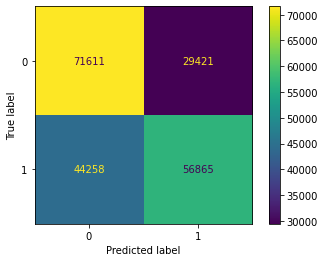

In [ ]:
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy: ", accuracy)
f1 = f1_score(Y_test, predictions)
precision = precision_score(Y_test, predictions)
recall = recall_score(Y_test, predictions)
auc = roc_auc_score(Y_test, predictions)
print("recall:", recall)
print("precision:", precision)
print("f1: ", f1)
print("AUC:", auc)
conf_mat = confusion_matrix(Y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=logit.classes_)
disp.plot()
plt.show()

# RFE

In [ ]:
from sklearn.feature_selection import RFE

#Select best feature 
rfe = RFE(logit, n_features_to_select= None)
rfe = rfe.fit(X_train, Y_train)

#Summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)
X_train.columns[rfe.support_]